# Modeling A Distribution Lab

### Introduction

In this lesson, we'll put our knowledge of modeling distributions to see the probability of different daily fluctuations in the stock market.

Let's start by loading our data.

In [25]:
import pandas as pd
stocks_df = pd.read_csv('upload_DJIA_table.csv')

In [26]:
stocks_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

Make sure that the data is in the correct format, and change it if it isn't.

In [27]:
date_col = pd.to_datetime(stocks_df['Date'])

stocks_df = stocks_df.assign(Date = date_col)

In [28]:
stocks_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

Let's start by getting a sense of the different dates in the column.  We'd like to get a sense of the range of years, months, and days before using it for our analysis.

Let's start with the year.  Display all of the years listed and the number of rows for each year.

> Do so without creating another column in your dataframe.

In [29]:
stocks_df['Date'].map(lambda x: x.year).value_counts()

# 2015    252
# 2014    252
# 2013    252
# 2011    252
# 2010    252
# 2009    252
# 2012    250
# 2016    126
# 2008    101
# Name: Date, dtype: int64

2015    252
2014    252
2013    252
2011    252
2010    252
2009    252
2012    250
2016    126
2008    101
Name: Date, dtype: int64

> Now one choice that we might consider is whether to include the years that appear to have missing data,  2016 and 2008.  Ideally we would choose a range of data, and then make sure that we have data for all of the dates.  For now, we'll just include all of the data.

We can also use group by to make a similar calculation.  Here we `groupby` the month and then count.

> Notice that groupby take a lambda function.  The argument passed the function is the index of the row, and so we select the row using iloc, then calculate the month value for each row.  Pandas groups by that returned month value.

In [31]:
# stocks_df

In [17]:
stocks_df.groupby(lambda idx: stocks_df.iloc[idx]['Date'].month).count()

,Date,Open,High,Low,Close,Volume,Adj Close
1,160,160,160,160,160,160,160
2,154,154,154,154,154,154,154
3,175,175,175,175,175,175,175
4,167,167,167,167,167,167,167
5,167,167,167,167,167,167,167
6,172,172,172,172,172,172,172
7,151,151,151,151,151,151,151
8,169,169,169,169,169,169,169
9,165,165,165,165,165,165,165
10,176,176,176,176,176,176,176


Ok, now we've seen that we have daily stock data for the years between 2008 and 2016, where 2008 and 2016 have missing data.

### Calculating Daily Change

Let's take another look at our dataframe.

In [18]:
stocks_df[:3]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


Now we'd like to track the daily fluctuations in the stock market, so add a column that shows difference between the open and close of the stock market, name the column `Movement`.  Assign the new dataframe to the variable `df_with_movement`.

In [32]:
movement = stocks_df['Open'] - stocks_df['Close']
df_with_movement = stocks_df.assign(Movement = movement)

Now that we have a plot that shows daily changes in the stock market, let's plot a frequency distribution of our `Movement` column.

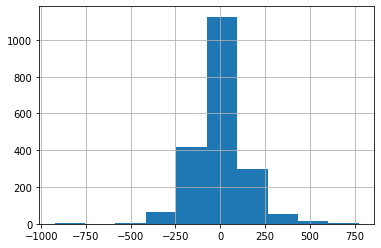

In [35]:
df_with_movement['Movement'].hist()

Next let's plot probability density function of the daily fluctuation in prices.

In [38]:
movement_col = df_with_movement['Movement']

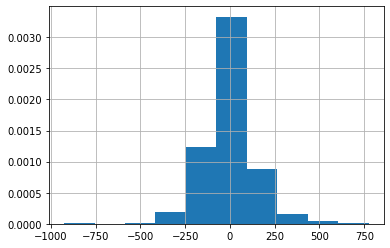

In [39]:
movement_col.hist(density = True)

### Modeling our Distribution

Now let's choose a normal distribution to begin modeling our random variable.  Begin by initializing a random variable with the location and spread values of our distribution above.

In [40]:
movement_col.std()

141.2279379239883

In [41]:
movement_col.mean()

-3.9162063846153483

In [42]:
import scipy.stats as stats
import numpy as np
norm_dist_djia = stats.norm(movement_col.mean(), movement_col.std())

In [45]:
norm_dist_djia.mean()
# -3.9162063846153483

norm_dist_djia.std()
# 141.2279379239883

141.2279379239883

Now create a list of 100 values between the one percentile value of the distribution and 99th percentile values. 

In [50]:
x = np.linspace(norm_dist_djia.ppf(0.001), norm_dist_djia.ppf(0.999), 100)
pdf_nums_norm = norm_dist_djia.pdf(x)

[Text(0.5, 1.0, 'normal distribution')]

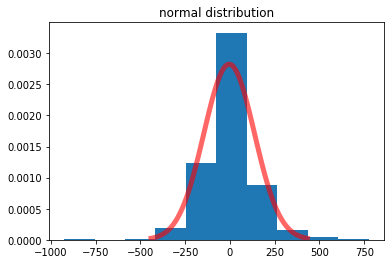

In [51]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(movement_col, density = True)
ax.plot(x, pdf_nums_norm,
'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set(title = 'normal distribution')

Let's see the probability according to our distribution of getting lower than -750 in a day.

In [54]:
import numpy as np
np.format_float_positional(norm_dist_djia.cdf(-750))

'0.00000006360021876390582'

Let's compare this to our the CDF on our actual data.

In [56]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
e_movement = ECDF(movement_col)

In [57]:
e_movement(-750)

0.001005530417295123

We can see that this is a very big difference (in statistical terms) than what our normal distribution modeled above.

### Changing our Distribution

Let's try a skewed normal distribution instead.

In [94]:
movement_col.std()

141.2279379239883

In [142]:
from scipy.stats import t
import numpy as np
rv_1 = t(df=2, loc=movement_col.mean(), scale=movement_col.std())
x = np.linspace(rv_1.ppf(0.0001), rv_1.ppf(0.9999), 100)
y_1 = rv_1.pdf(x) 

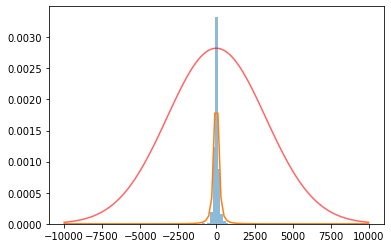

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(111)
ax_1.plot(x, pdf_nums_norm,
'r-', alpha=0.6, label='norm pdf')
ax_1.hist(movement_col, density = True, alpha = .5)
ax_1.plot(x,y_1)

Now let's look at the probabilituy of a fluctuation less than -750.

In [144]:
np.format_float_positional(rv_1.cdf(-750))

'0.017006983460026732'

In [145]:
e_movement(-750)

0.001005530417295123

### Resources

As an alternative to our aggregated dataset, [also see the UCI dataset](http://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index) for daily prices of individual stocks.

### Extra

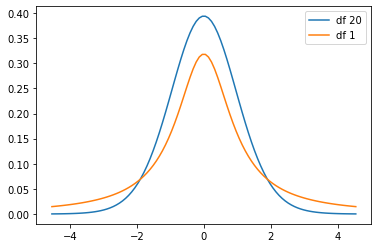